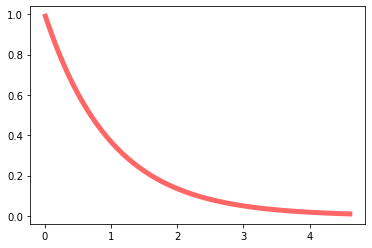

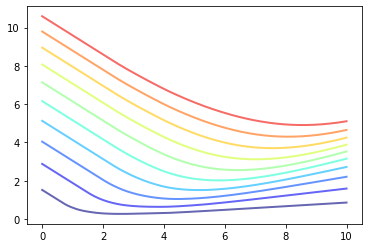

y_star= 5.254942436103271


In [2]:


# -*- coding: utf-8 -*-
"""
Spyder Editor

This is a temporary script file.
"""

import matplotlib.pyplot as plt
import numpy as np

from scipy.interpolate import interp1d
from scipy.stats import expon
from scipy.optimize import minimize_scalar


fig, ax = plt.subplots(1, 1)
x = np.linspace(expon.ppf(0.01),
                expon.ppf(0.99), 100)
ax.plot(x, expon.pdf(x),
       'r-', lw=5, alpha=0.6, label='expon pdf')
plt.show()

β=0.95
np.random.seed(123)
r = expon.rvs(scale=1,loc=0,size=200)
x_grid = np.linspace(1e-5, 10, 200)
p = 1 #order cost


def phi(x_t):
    return np.mean((x_t>0)*(0.1*x_t)+(x_t<=0)*(-2*x_t))

def f(s,u,d):
    return s+ u - d

def objective(u,s,β,v_array,r,x_grid): 
    v = interp1d(x_grid, v_array,fill_value="extrapolate")
    x = f(s,u,r)
    return u + β * np.mean(phi(x))+β * np.mean(v(x))
  
def minimize(g,args):
    objective = lambda x:g(x, *args)
    args = list(args)
    s = args[0]
    #lb = s - args[0]
    result = minimize_scalar(objective,method='bounded',bounds=(0,10^6))
    minimizer, minimum = result.x, result.fun
    return minimizer, minimum

def TV(v):
    v_new = np.empty_like(r)
    v_greedy = np.empty_like(r)
    for i in range(len(x_grid)):
        s = x_grid[i]
        # Maximize RHS of Bellman equation at state s
        u_star, v_min = minimize(objective, (s,β,v,r,x_grid))
        v_new[i] = v_min
        v_greedy[i] = u_star+s
    return v_greedy,v_new
    
v = np.zeros(len(x_grid))

n= 10
fig,ax = plt.subplots()
for i in range(n):
    v_greedy,v = TV(v)
    ax.plot(x_grid,v, color=plt.cm.jet(i/n),lw=2,alpha=0.6)
plt.show()
print("y_star=",np.mean(v_greedy))

